In [31]:
#CS577_HW4_NitiW_multi
#Niti Wattanasirichaigoon
#A20406934

from keras import layers, models, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Input
from keras.layers import Conv2D, MaxPooling2D, concatenate
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
# Load CIFAR-10 data and preprocess
from keras.datasets import cifar10
from keras.utils import to_categorical

# split the data into train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# split 20% of training data for validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle= True)

# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_valid = to_categorical(y_valid, 10)

# Normalize data
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (40000, 32, 32, 3)
40000 train samples
10000 test samples
10000 validation samples


In [19]:
# function to build model
def build_model1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    opt = optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
    return model

In [11]:
# Define plotting function
def plot_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc)+1)
    
    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()    

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 21s - loss: 1.8161 - acc: 0.3397 - val_loss: 1.6001 - val_acc: 0.4185
Epoch 2/20
 - 21s - loss: 1.4965 - acc: 0.4568 - val_loss: 1.3935 - val_acc: 0.5020
Epoch 3/20
 - 21s - loss: 1.3719 - acc: 0.5089 - val_loss: 1.2907 - val_acc: 0.5393
Epoch 4/20
 - 21s - loss: 1.2822 - acc: 0.5452 - val_loss: 1.2307 - val_acc: 0.5647
Epoch 5/20
 - 21s - loss: 1.2121 - acc: 0.5726 - val_loss: 1.1535 - val_acc: 0.6012
Epoch 6/20
 - 21s - loss: 1.1491 - acc: 0.5956 - val_loss: 1.0995 - val_acc: 0.6149
Epoch 7/20
 - 21s - loss: 1.0961 - acc: 0.6158 - val_loss: 1.0445 - val_acc: 0.6372
Epoch 8/20
 - 21s - loss: 1.0494 - acc: 0.6321 - val_loss: 1.0154 - val_acc: 0.6476
Epoch 9/20
 - 21s - loss: 1.0035 - acc: 0.6513 - val_loss: 0.9727 - val_acc: 0.6611
Epoch 10/20
 - 21s - loss: 0.9708 - acc: 0.6607 - val_loss: 0.9767 - val_acc: 0.6609
Epoch 11/20
 - 21s - loss: 0.9357 - acc: 0.6729 - val_loss: 0.9115 - val_acc: 0.6804
Epoch 12/20
 - 21s - los

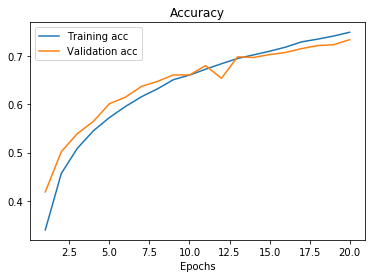

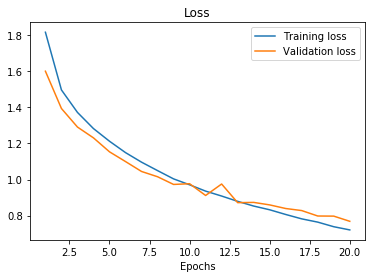

In [20]:
# train initial model
model1 = build_model1()
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid), verbose=2, shuffle=True)
plot_results(history1)

In [21]:
# function to build model
def build_model2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10, activation='softmax'))

    opt = optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
    return model

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 21s - loss: 1.8641 - acc: 0.3192 - val_loss: 1.6862 - val_acc: 0.3982
Epoch 2/50
 - 21s - loss: 1.5489 - acc: 0.4379 - val_loss: 1.4211 - val_acc: 0.4867
Epoch 3/50
 - 21s - loss: 1.4127 - acc: 0.4938 - val_loss: 1.3334 - val_acc: 0.5169
Epoch 4/50
 - 21s - loss: 1.3229 - acc: 0.5262 - val_loss: 1.2450 - val_acc: 0.5618
Epoch 5/50
 - 21s - loss: 1.2424 - acc: 0.5612 - val_loss: 1.1808 - val_acc: 0.5864
Epoch 6/50
 - 21s - loss: 1.1810 - acc: 0.5815 - val_loss: 1.1527 - val_acc: 0.5981
Epoch 7/50
 - 21s - loss: 1.1281 - acc: 0.6024 - val_loss: 1.0751 - val_acc: 0.6213
Epoch 8/50
 - 21s - loss: 1.0793 - acc: 0.6211 - val_loss: 1.0645 - val_acc: 0.6269
Epoch 9/50
 - 21s - loss: 1.0360 - acc: 0.6363 - val_loss: 0.9988 - val_acc: 0.6498
Epoch 10/50
 - 21s - loss: 1.0040 - acc: 0.6479 - val_loss: 0.9788 - val_acc: 0.6541
Epoch 11/50
 - 21s - loss: 0.9695 - acc: 0.6604 - val_loss: 0.9358 - val_acc: 0.6713
Epoch 12/50
 - 21s - los

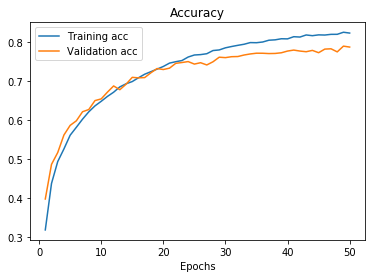

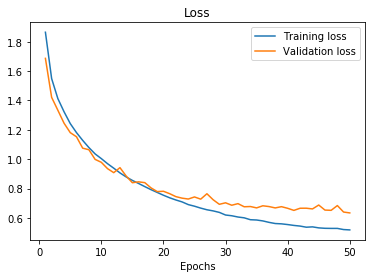

In [23]:
model2 = build_model2()
history2 = model2.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_valid, y_valid), verbose=2, shuffle=True)
plot_results(history2)

In [24]:
# Evaluate model
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 205us/step


[0.6380073892593384, 0.7838000059127808]

In [39]:
# Adding an inception block to the model (functional API)
def build_incep_model():
    input_img = Input(shape=(x_train.shape[1], x_train.shape[2], 3))
    
    # 1st block
    layer1 = Conv2D(32, (3, 3), activation='relu')(input_img)
    layer2 = Conv2D(32, (3, 3), activation='relu')(layer1)
    layer2 = MaxPooling2D(pool_size=(2, 2))(layer2)
    layer2 = Dropout(0.25)(layer2)
    
    # 2nd block
    layer3 = Conv2D(64, (3, 3), activation='relu')(layer2)
    layer4 = Conv2D(64, (3, 3), activation='relu')(layer3)
    layer4 = MaxPooling2D(pool_size=(2, 2))(layer4)
    layer4 = Dropout(0.25)(layer4)
    
    # inception block
    branch_a = Conv2D(64, (3, 3), activation='relu')(layer4)
    branch_b = Conv2D(64, (3, 3), activation='relu')(layer4)
    branch_b = Conv2D(64, (3, 3), padding = 'same', activation='relu')(branch_b)
    branch_c = Conv2D(64, (3, 3), activation='relu')(layer4)
    branch_c = MaxPooling2D(pool_size=(2, 2), padding='same', strides=(1,1))(branch_c)
    incep = concatenate([branch_a, branch_b, branch_c], axis=-1)
    
    # Flatten
    flat = Flatten()(incep)
    
    # Dense layers
    dense1 = Dense(512, activation='relu')(flat)
    drop = Dropout(0.25)(dense1)
    output = Dense(10, activation='softmax')(drop)
    
    model = models.Model([input_img], output)
    opt = optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
    return model


In [43]:
model3 = build_incep_model()
history3 = model3.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_valid, y_valid), verbose=2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 26s - loss: 1.9049 - acc: 0.2916 - val_loss: 1.6820 - val_acc: 0.3821
Epoch 2/50
 - 26s - loss: 1.5871 - acc: 0.4188 - val_loss: 1.4358 - val_acc: 0.4769
Epoch 3/50
 - 26s - loss: 1.4230 - acc: 0.4816 - val_loss: 1.3450 - val_acc: 0.5238
Epoch 4/50
 - 26s - loss: 1.3107 - acc: 0.5293 - val_loss: 1.2239 - val_acc: 0.5665
Epoch 5/50
 - 26s - loss: 1.2300 - acc: 0.5597 - val_loss: 1.2272 - val_acc: 0.5634
Epoch 6/50
 - 26s - loss: 1.1636 - acc: 0.5882 - val_loss: 1.1069 - val_acc: 0.6092
Epoch 7/50
 - 26s - loss: 1.1063 - acc: 0.6087 - val_loss: 1.0515 - val_acc: 0.6286
Epoch 8/50
 - 26s - loss: 1.0573 - acc: 0.6270 - val_loss: 1.0217 - val_acc: 0.6365
Epoch 9/50
 - 26s - loss: 1.0123 - acc: 0.6400 - val_loss: 0.9710 - val_acc: 0.6560
Epoch 10/50
 - 26s - loss: 0.9754 - acc: 0.6567 - val_loss: 0.9456 - val_acc: 0.6686
Epoch 11/50
 - 26s - loss: 0.9430 - acc: 0.6647 - val_loss: 0.9452 - val_acc: 0.6688
Epoch 12/50
 - 26s - los

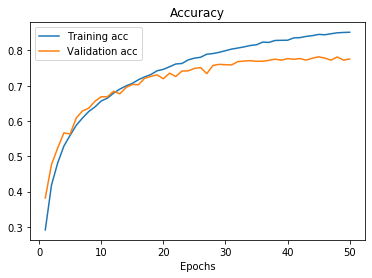

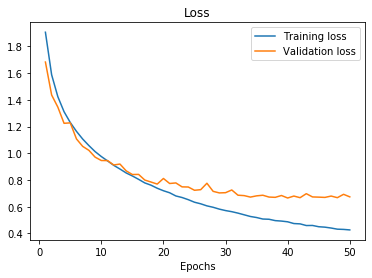

In [44]:
plot_results(history3)

In [45]:
# Evaluate inception model
model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 240us/step


[0.680717589855194, 0.7748000025749207]

In [52]:
# Adding a residule block to the model (functional API)
def build_res_model():
    input_img = Input(shape=(x_train.shape[1], x_train.shape[2], 3))
    
    # 1st block
    layer1 = Conv2D(32, (3, 3), activation='relu')(input_img)
    layer2 = Conv2D(32, (3, 3), activation='relu')(layer1)
    layer2 = MaxPooling2D(pool_size=(2, 2))(layer2)
    layer2 = Dropout(0.25)(layer2)
    
    # 2nd block
    layer3 = Conv2D(64, (3, 3), activation='relu')(layer2)
    layer4 = Conv2D(64, (3, 3), activation='relu')(layer3)
    layer4 = MaxPooling2D(pool_size=(2, 2))(layer4)
    layer4 = Dropout(0.25)(layer4)
    
    # residual block
    layer5 = Conv2D(128, (3, 3), padding='same', activation='relu')(layer4)
    layer6 = Conv2D(128, (3, 3), padding='same', activation='relu')(layer5)
    layer6 = Conv2D(64, (1, 1), activation='relu')(layer6)
    layer6 = layers.add([layer6,layer4])
    layer6 = MaxPooling2D(pool_size=(2, 2))(layer6)
    
    # Flatten
    flat = Flatten()(layer6)
    
    # Dense layers
    dense1 = Dense(512, activation='relu')(flat)
    drop = Dropout(0.25)(dense1)
    output = Dense(10, activation='softmax')(drop)
    
    model = models.Model([input_img], output)
    opt = optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
    return model

In [53]:
model4 = build_res_model()
history4 = model4.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_valid, y_valid), verbose=2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
 - 26s - loss: 1.9489 - acc: 0.2689 - val_loss: 1.7128 - val_acc: 0.3734
Epoch 2/50
 - 22s - loss: 1.6492 - acc: 0.3889 - val_loss: 1.5548 - val_acc: 0.4217
Epoch 3/50
 - 22s - loss: 1.5151 - acc: 0.4442 - val_loss: 1.4594 - val_acc: 0.4725
Epoch 4/50
 - 23s - loss: 1.3994 - acc: 0.4890 - val_loss: 1.3146 - val_acc: 0.5307
Epoch 5/50
 - 22s - loss: 1.3127 - acc: 0.5236 - val_loss: 1.2210 - val_acc: 0.5581
Epoch 6/50
 - 22s - loss: 1.2424 - acc: 0.5543 - val_loss: 1.1891 - val_acc: 0.5771
Epoch 7/50
 - 23s - loss: 1.1825 - acc: 0.5751 - val_loss: 1.1244 - val_acc: 0.6069
Epoch 8/50
 - 23s - loss: 1.1286 - acc: 0.5998 - val_loss: 1.1109 - val_acc: 0.6021
Epoch 9/50
 - 23s - loss: 1.0818 - acc: 0.6183 - val_loss: 1.0584 - val_acc: 0.6225
Epoch 10/50
 - 22s - loss: 1.0421 - acc: 0.6301 - val_loss: 1.0173 - val_acc: 0.6427
Epoch 11/50
 - 23s - loss: 1.0041 - acc: 0.6441 - val_loss: 0.9840 - val_acc: 0.6473
Epoch 12/50
 - 23s - los

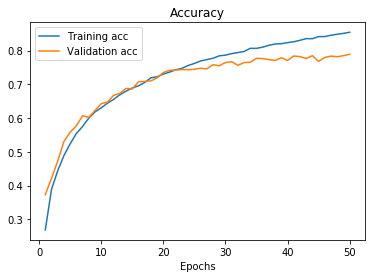

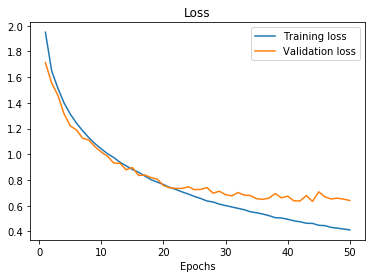

In [54]:
plot_results(history4)

In [55]:
# Evaluate residual model
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 255us/step


[0.6675955352783203, 0.7807000279426575]